### Required Assignment 9.4: LASSO and Sequential Feature Selection


**Expected Time: 60 Minutes**

**Total Points: 50**

This assignment introduces the `Ridge` regression estimator from scikitlearn.  You will revisit the insurance data from the previous assignment and experiment with varying the `alpha` parameter discussed in Video 9.4. Your work here is a basic introduction where complexity in the preprocessing steps will be added to scale your data.  For now, you are just to familiarize yourself with the `Ridge` regression estimator and its `alpha` parameter. 

This assignment compares a second regularized regression method -- the LASSO -- with that of sequential feature selection.  The LASSO will be briefly discussed below, and you will use the scikit learn implementation.  Rather than using the LASSO as a model, you are to compare it to the `SequentialFeatureSelection` transformer as a method to select important features for a regression model. 


#### Index

- [Problem 1](#Problem-1)
- [Problem 2](#Problem-2)
- [Problem 3](#Problem-3)
- [Problem 4](#Problem-4)
- [Problem 5](#Problem-5)

In [15]:
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SequentialFeatureSelector, SelectFromModel
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import set_config
set_config(display="diagram")


import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px

### The Data

For this exercise, you will revisit the automotive data.  The goal is again to predict the `mpg` column using the other numeric features.  You will build a polynomial model of degree 3 to compare the results of a `Lasso` and that of a `LinearRegression` model. Finally, you will use the `Lasso` estimator to select features in a pipeline with `SelectFromModel`. 

Below, the train and test data is created for you as `auto_X_train`, `auto_X_test`, `auto_y_train`, and `auto_y_test`.

In [29]:
food = pd.read_csv('data/Pakistan_Food_Prices_2025.csv')

from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
fetch_california_housing(return_X_y=False, as_frame=True)

{'data':        MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
 0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
 1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
 2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
 3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
 4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
 ...       ...       ...       ...        ...         ...       ...       ...   
 20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
 20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
 20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
 20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
 20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   
 
        Longitude 

In [17]:

#get dummy for catagorial columns
food = pd.get_dummies(food, drop_first=True)
food.info()
food.describe()
food.isnull().sum()
food = food.dropna()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 67 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Price_per_Kg                  1100 non-null   float64
 1   Item_Banana                   1100 non-null   bool   
 2   Item_Beef (Local)             1100 non-null   bool   
 3   Item_Carrot                   1100 non-null   bool   
 4   Item_Cheese (Local)           1100 non-null   bool   
 5   Item_Chicken (Whole)          1100 non-null   bool   
 6   Item_Chicken Breast           1100 non-null   bool   
 7   Item_Chickpeas                1100 non-null   bool   
 8   Item_Cooking Oil (Sunflower)  1100 non-null   bool   
 9   Item_Eggplant                 1100 non-null   bool   
 10  Item_Fish (Pomfret)           1100 non-null   bool   
 11  Item_Fish (Rohu)              1100 non-null   bool   
 12  Item_Flour (Atta)             1100 non-null   bool   
 13  Ite

Best parameters found:  {'poly_features__degree': 1}
Test MSE of best model:  6265.717250568826
Pipeline(steps=[('poly_features',
                 PolynomialFeatures(degree=1, include_bias=False)),
                ('selector',
                 SequentialFeatureSelector(estimator=LinearRegression(),
                                           n_features_to_select=10)),
                ('linreg', LinearRegression())])


ValueError: x and y must be the same size

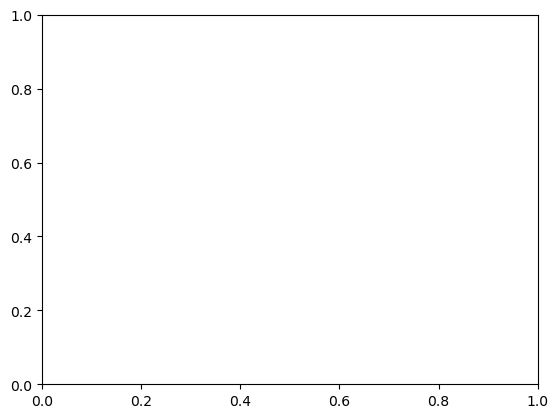

In [ ]:
#generate train/test data for auto
sequential_pipe = Pipeline([('poly_features', PolynomialFeatures(degree = 1, include_bias = False)),
                           ('selector', SequentialFeatureSelector(LinearRegression(), 
                                                                  n_features_to_select=10)),
                           ('linreg', LinearRegression())])

model_finder = GridSearchCV(sequential_pipe, 
                            param_grid = {'poly_features__degree': [1]},
                            cv = 2,
                            scoring = 'neg_mean_squared_error',
                            n_jobs = -1)

X = food[['Item_Banana', 'Item_Beef (Local)', 'Item_Carrot', 'Item_Cheese (Local)', 'Item_Chicken (Whole)', 'Item_Chicken Breast', 'Item_Chickpeas', 'Item_Cooking Oil (Sunflower)', 'Item_Eggplant', 'Item_Fish (Pomfret)', 'Item_Fish (Rohu)', 'Item_Flour (Atta)', 'Item_Ghee', 'Item_Grapes', 'Item_Guava', 'Item_Lentils (Masoor)', 'Item_Lentils (Moong)', 'Item_Maize', 'Item_Mango', 'Item_Milk', 'Item_Mutton', 'Item_Onion', 'Item_Oranges', 'Item_Potato', 'Item_Rice (Basmati)', 'Item_Rice (Irri)', 'Item_Salt', 'Item_Spices (Mixed)', 'Item_Spinach', 'Item_Sugar', 'Item_Tea (Loose)', 'Item_Tomato', 'Item_Wheat', 'Item_Yogurt', 'Category_Condiment', 'Category_Dairy', 'Category_Fruit', 'Category_Grain', 'Category_Meat', 'Category_Oil', 'Category_Pulses', 'Category_Vegetable', 'City_Hyderabad', 'City_Islamabad', 'City_Karachi', 'City_Lahore', 'City_Multan', 'City_Peshawar', 'City_Quetta', 'City_Rawalpindi', 'City_Sialkot', 'Month_August', 'Month_December', 'Month_February', 'Month_January', 'Month_July', 'Month_June', 'Month_March', 'Month_May', 'Month_November', 'Month_October', 'Month_September', 'Source_Municipal Report', 'Source_Online Retailer', 'Source_Retailer Listing', 'Source_Wholesale Market']]
y = food['Price_per_Kg'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)   
model_finder.fit(X_train, y_train)
print("Best parameters found: ", model_finder.best_params_)
best_model = model_finder.best_estimator_
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Test MSE of best model: ", mse)
print(best_model)
fig = px.scatter_3d(food, x='Item_Wheat', y='Item_Banana', z='Price_per_Kg', title='3D Scatter plot of Wheat, Rice and Total Price')
fig.show()

# Uncomment to visualize solutions
ols_preds = best_model.predict(X)
Xnp = X.to_numpy()
plt.scatter(Xnp, y, label = 'data')
plt.plot(Xnp, ols_preds, 'r--', label = 'ols predictions')
plt.legend()
plt.grid()


[Back to top](#Index:) 

### Problem 1

#### The auto data

**10 Points**

To start, build a `Pipeline` named `auto_pipe` with named steps `polyfeatures`, `scaler` and `lasso` model that utilizes `PolynomialFeatures`, `StandardScaler`, and the `Lasso` estimator with the following parameters:

- `degree = 3` in `PolynomialFeatures`
- `include_bias = False` in `PolynomialFeatures`
- `random_state = 42` in `Lasso`

Fit the pipeline on `auto_X_train` and `auto_y_train` data given.  Extract the lasso coefficients from the pipeline and assign them as an array to `lasso_coefs` below.  

**HINT**: Use the `.named_steps['lasso']` to extract that lasso estimator and use the `.coef_` attribute after fitting to access the model coefficients.

In [ ]:
### GRADED

auto_pipe = ''
lasso_coefs = ''

### BEGIN SOLUTION
auto_pipe = Pipeline([('polyfeatures', PolynomialFeatures(degree = 3, include_bias = False)),
                      ('scaler', StandardScaler()),
                     ('lasso', Lasso(random_state = 42))])
auto_pipe.fit(auto_X_train, auto_y_train)
lasso_coefs = auto_pipe.named_steps['lasso'].coef_
### END SOLUTION

# Answer check
print(type(lasso_coefs))
print(lasso_coefs)
auto_pipe

[Back to top](#Index:) 

### Problem 2

#### Error in `Lasso` model

**10 Points**

Now, compute the mean squared error of the LASSO model on both the train and test data, `auto_X_train` and `auto_X_test`, respectively.  Assign this as a float to `lasso_train_mse` and `lasso_test_mse`, respectively.  

In [ ]:
### GRADED

lasso_train_mse = ''
lasso_test_mse = ''

### BEGIN SOLUTION
lasso_train_mse = mean_squared_error(auto_y_train, auto_pipe.predict(auto_X_train))
lasso_test_mse = mean_squared_error(auto_y_test, auto_pipe.predict(auto_X_test))
### END SOLUTION

# Answer check
print(lasso_train_mse)
print(lasso_test_mse)

[Back to top](#Index:) 

### Problem 3

#### Non-zero coefficients

**10 Points**

Using the `lasso_coefs` determine the number of features with non-zero coefficients and determine the name of those features as a result of the polynomial feature transformation.  

To do this, access the `named_steps['polyfeatures']` feature from the `auto_pipe` pipeline and chain the `get_feature_names_out()` to get the features name. Assign the result to `feature_names`.

Next, create a DataFrame named `lasso_df` below that has two columns -- `feature` and `coef`.  To the `feature` column assign `feature_names`. To the `coef` column assign `lasso_coefs`.

In [ ]:
### GRADED
feature_names = ''
lasso_df = ''


### BEGIN SOLUTION
feature_names = auto_pipe.named_steps['polyfeatures'].get_feature_names_out()
lasso_df = pd.DataFrame({'feature': feature_names, 'coef': lasso_coefs})
### END SOLUTION

# Answer check
print(type(feature_names))
lasso_df.loc[lasso_df['coef'] != 0]

[Back to top](#Index:) 

### Problem 4

#### Comparing `Lasso` to `SequentialFeatureSelection`

**10 Points**

As seen above, the Lasso model effectively eliminated all but 6 features from the cubic polynomial example.  Now, you are to build a `Pipeline` object called `sequential_pipe` with named steps `poly_features`, `selector`, and `linreg` with `PolynomialFeatures`, `SequentialFeatureSelector`, and `LinearRegression` respectively that uses the folowing parameters:

- `degree = 3` in `PolynomialFeatures` step `poly_features`
- `include_bias = False` in `PolynomialFeatures` step `poly_features`
- `n_features_to_select = 6` in `selector`

Assign this pipeline object to `sequential_pipe`.

Next, use the `fit` function on `scaled_pipe` to train your model on `auto_X_train` and `auto_y_train`. 

Use the `mean_squared_error` function to compute the MSE between `auto_y_train` and` sequential_pipe.predict(auto_X_train)`. Assign your result to `sequential_train_mse`.

Use the `mean_squared_error` function to compute the MSE between `auto_y_test` and `sequential_pipe.predict(auto_X_test)`. Assign your result to `sequential_test_mse`.



In [ ]:
### GRADED
sequential_pipe = ''
sequential_train_mse = ''
sequential_test_mse = ''


### BEGIN SOLUTION
sequential_pipe = Pipeline([('poly_features', PolynomialFeatures(degree = 3, include_bias = False)),
                           ('selector', SequentialFeatureSelector(LinearRegression(), 
                                                                  n_features_to_select=6)),
                           ('linreg', LinearRegression())])
sequential_pipe.fit(auto_X_train, auto_y_train)
sequential_train_mse = mean_squared_error(auto_y_train, sequential_pipe.predict(auto_X_train))
sequential_test_mse = mean_squared_error(auto_y_test, sequential_pipe.predict(auto_X_test))
### END SOLUTION

# Answer check
print(sequential_train_mse)
print(sequential_test_mse)
sequential_pipe

[Back to top](#Index:) 

### Problem 5

#### Using `Lasso` as a feature selector

**10 Points**

Rather than using the `Lasso` as the estimator, you can use the results of the `Lasso` to select features that are subsequently used in a `LinearRegression` estimator.  To do so, scikitlearn provides a function in the `feature_selection` module called `SelectFromModel` that will select the features based on coefficients.  

As such, using the `Lasso` estimator to select features would involve instantiating the `SelectFromModel` transformer and selecting features as:

```python
selector = SelectFromModel(Lasso())
selector.transform(auto_X_train)
```



From here, the selector can be used in a `Pipeline` after transforming the features and before building a regression model.  Such a pipeline is given below and you are to use this to fit on the training data and score on the testing data.  Which model performs better, the model with sequential feature selection or that using the `Lasso` to select the features?  

Assign your train and test error using the `model_selector_pipe` as `selector_train_mse` and `selector_test_mse` below.

For more information and examples on `SelectFromModel` see [here](https://scikit-learn.org/stable/modules/feature_selection.html#select-from-model).

In [ ]:
model_selector_pipe = Pipeline([('poly_features', PolynomialFeatures(degree = 3, include_bias = False)),
                                ('scaler', StandardScaler()),
                                ('selector', SelectFromModel(Lasso())),
                                    ('linreg', LinearRegression())])

In [ ]:
### GRADED
selector_train_mse = ''
selector_test_mse = ''


### BEGIN SOLUTION
model_selector_pipe.fit(auto_X_train, auto_y_train)
selector_train_mse = mean_squared_error(auto_y_train, model_selector_pipe.predict(auto_X_train))
selector_test_mse = mean_squared_error(auto_y_test, model_selector_pipe.predict(auto_X_test))
### END SOLUTION

# Answer check
print(selector_train_mse)
print(selector_test_mse)

Further work could involve grid searching parameters of both the transformers and estimators, as well as including a `Ridge` regressor in the mix.  For now, you should be getting comfortable using the scikitlearn `Pipeline` object to combine transformers and estimators. This module introduced examples that can mitigate overfitting in a regression context.  It is important to note that not one strategy is always best for a modeling problem.  Instead, you should consider multiple approaches and let your goals for the model guide you to determine which model best suits your performance metric.